# Importing Necessary Libraries

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Acquisition


In [2]:
data=pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

#EDA

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.shape

(50000, 2)

In [6]:
data.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [7]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [8]:
data.index

RangeIndex(start=0, stop=50000, step=1)

In [9]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [10]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
data["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Data Visulaization


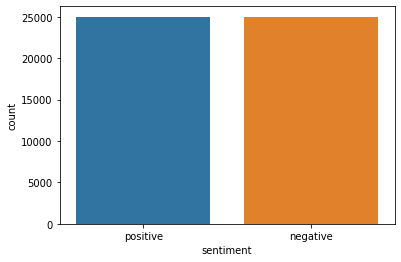

In [12]:
sns.countplot(x=data["sentiment"])

In [12]:
data["sentiment"]=pd.get_dummies(data["sentiment"])

In [13]:
data["sentiment"].value_counts()


1    25000
0    25000
Name: sentiment, dtype: int64

0- Positive
1- Negative

In [14]:
data["sentiment"].head()

0    0
1    0
2    0
3    1
4    0
Name: sentiment, dtype: uint8

# split the dataset

In [15]:
X=data["review"]
y=data["sentiment"]
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=3,test_size=0.2)
X_train.shape,y_train.shape


((40000,), (40000,))

In [16]:
X_test.shape,y_test.shape

((10000,), (10000,))

# Data preprocessing

**Text normalization**

In [17]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

**Removing special characters**

In [18]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
data["review"]=data["review"].apply(strip_html)    

In [19]:
##htmltxt = strip_html("<p>Hello World</p>")
##htmltxt

In [20]:
#Define function for removing special characters
def remove_spl_char(text, remove_digits=True):
    text=re.sub('\[[^]]*\]', '', text)
    text=re.sub('[^a-zA-z0-9\s]','',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_spl_char)


In [21]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production The filming tech...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically theres a family where a little boy J...,1
4,Petter Matteis Love in the Time of Money is a ...,0


**Text stemming process**

In [22]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['review']=data['review'].apply(simple_stemmer)

In [23]:
data.head()

,review,sentiment
0,one of the other review ha mention that after ...,0
1,A wonder littl product the film techniqu is ve...,0
2,I thought thi wa a wonder way to spend time on...,0
3,basic there a famili where a littl boy jake th...,1
4,petter mattei love in the time of money is a v...,0


**Removing stopwords**

In [24]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

{"should've", 'itself', 'should', 'such', 't', 'an', 'other', 'been', 'was', 'both', 'about', 'by', 'their', 'yours', 'during', "shouldn't", 'she', 'own', 'am', 'from', 'because', 'again', 'ourselves', 'himself', 'hasn', "couldn't", 'any', 'isn', 'same', 'very', 'as', "won't", 'are', "mightn't", 'these', 'before', 'herself', "haven't", 'between', 'few', 'mightn', 'out', 'some', 'doing', "weren't", 'while', 'below', 'we', 'aren', 'on', 'over', 'd', 'if', 'theirs', 'all', "wasn't", 'so', 'there', "hadn't", 'me', 'up', 'hadn', 'through', 'ours', 'no', 'i', 'y', 'the', 'at', 've', 'off', 'has', 'to', 'when', 'm', 'after', 'that', 'they', 'needn', "that'll", 'ain', 'couldn', 'or', 'our', "isn't", "needn't", 'is', 'haven', 'once', 'hers', 'be', 'wasn', 'myself', 'its', 'this', 'him', 'can', 'he', 'too', 'your', 'why', 'having', 's', 'will', 'with', 're', 'of', 'themselves', 'how', "hasn't", 'nor', 'where', 'just', 'not', 'in', "shan't", "didn't", 'until', "don't", "doesn't", 'now', 'didn', '

In [25]:

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    #tokens = tokens.lower()
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

In [26]:
data['review'].head()

0    one review ha mention watch 1 Oz episod youll ...
1    wonder littl product film techniqu veri unassu...
2    thought thi wa wonder way spend time hot summe...
3    basic famili littl boy jake think zombi hi clo...
4    petter mattei love time money visual stun film...
Name: review, dtype: object

**Bags of words processing**

In [27]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(X_train)
#transformed test reviews
cv_test_reviews=cv.transform(X_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 6174474)
BOW_cv_test: (10000, 6174474)


split the dataset  
train dataset
X_train=data.review[:40000]
y_train=data.sentiment[:40000]
test dataset
X_test=data.review[40000:]
y_test=data.sentiment[40000:]
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
 New section
BOW_cv_train: (40000, 6200505)
BOW_cv_test: (10000, 6200505)

**Term Frequency-Inverse Document Frequency model (TFIDF)**

In [28]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(X_train)
#transformed test reviews
tv_test_reviews=tv.transform(X_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6174474)
Tfidf_test: (10000, 6174474)


# Machine learning model

**training the model**

In [29]:

lr=LogisticRegression(max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,y_train)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


**Predicting the model**

In [30]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)

##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)

**Predict the Accuracy**

In [31]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7633
lr_tfidf_score : 0.7615
